In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

objc[41110]: Class CaptureDelegate is implemented in both /Users/alexanderhsu/miniconda/envs/hands/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x15f908860) and /Users/alexanderhsu/miniconda/envs/hands/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x2b05e2840). One of the two will be used. Which one is undefined.
objc[41110]: Class CVWindow is implemented in both /Users/alexanderhsu/miniconda/envs/hands/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x127d24a68) and /Users/alexanderhsu/miniconda/envs/hands/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x2b05e2890). One of the two will be used. Which one is undefined.
objc[41110]: Class CVView is implemented in both /Users/alexanderhsu/miniconda/envs/hands/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x127d24a90) and /Users/alexanderhsu/miniconda/envs/hands/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x2b05e28b8). One of the two will be used.

In [2]:
mp_hands = mp.solutions.hands
mp_hands.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [3]:
filepath = '../temp_video_0_pose.csv'

In [4]:
df = pd.read_csv(filepath, low_memory=False)

In [5]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,15.0,0.720934,0.457977,1.318742e-07,0.751330,0.518628,-0.012350,0.762106,0.600006,...,-0.045331,0.566964,0.529071,-0.062468,0.555755,0.535933,-0.063553,0.550839,0.537501,-0.062093
1,1,16.0,0.660564,0.452274,-8.903192e-08,0.682150,0.500889,-0.022043,0.689541,0.564999,...,-0.052324,0.523806,0.501571,-0.071135,0.528089,0.494964,-0.071394,0.543651,0.485350,-0.068454
2,2,17.0,0.611528,0.423485,7.320595e-08,0.604316,0.441231,-0.003930,0.583624,0.478785,...,-0.017545,0.543654,0.508865,-0.022971,0.534050,0.528100,-0.025299,0.527017,0.537094,-0.026239
3,3,18.0,0.557621,0.402431,4.794640e-08,0.564681,0.442849,-0.007136,0.554410,0.485310,...,-0.019964,0.459672,0.396809,-0.026668,0.451214,0.395308,-0.027093,0.448635,0.394459,-0.026413
4,4,19.0,0.476457,0.381973,5.636107e-08,0.456895,0.361644,-0.003920,0.431468,0.356310,...,-0.020462,0.448346,0.452990,-0.025887,0.442516,0.464160,-0.026859,0.436790,0.471100,-0.027548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2644,3030.0,0.327234,0.898595,8.481851e-09,0.308188,0.894424,-0.003335,0.288791,0.901396,...,-0.015151,0.291372,0.938971,-0.019707,0.294549,0.939358,-0.017665,0.298922,0.935259,-0.015121
2645,2645,3035.0,0.171738,0.846931,-1.419774e-07,0.180844,0.828991,-0.010811,0.194850,0.807141,...,-0.032141,0.182545,0.881781,-0.035724,0.183085,0.889722,-0.035036,0.182101,0.897118,-0.036841
2646,2646,3036.0,0.202385,0.852058,-2.174640e-07,0.196264,0.872442,-0.006214,0.189505,0.890087,...,-0.016135,0.183520,0.815049,-0.020862,0.188567,0.813184,-0.019865,0.190651,0.811379,-0.018429
2647,2647,3040.0,0.203104,0.840155,-1.810873e-08,0.223220,0.844513,0.000818,0.237463,0.860715,...,-0.008148,0.213755,0.919823,-0.008831,0.216355,0.930811,-0.008012,0.218522,0.939335,-0.007320


In [18]:
x1, y1 = pose_digit1[:50, 0], pose_digit1[:50, 1]
x2, y2 = pose_digit2[:50, 0], pose_digit2[:50, 1]
data_dict = {'condition': np.hstack([np.repeat(i, len(x1)) for i in range(2)]),
             'data': np.hstack((x1, x2))}
data_df = pd.DataFrame(data=data_dict)
data_df

,condition,data
0,0,1.500000e+01
1,0,1.600000e+01
2,0,1.700000e+01
3,0,1.800000e+01
4,0,1.900000e+01
...,...,...
95,1,-5.445082e-07
96,1,-5.437250e-07
97,1,-5.450405e-07
98,1,-5.436017e-07


In [6]:
pose_digit1 = np.array(df.iloc[:, 1:4])
pose_digit2 = np.array(df.iloc[:, 4:7])
pose_digit3 = np.array(df.iloc[:, 7:10])

In [14]:
pose_digit1.shape, pose_digit2

((2649, 3),
 array([[ 1.31874188e-07,  7.51329899e-01,  5.18628001e-01],
        [-8.90319214e-08,  6.82150364e-01,  5.00888705e-01],
        [ 7.32059533e-08,  6.04316473e-01,  4.41231251e-01],
        ...,
        [-2.17464020e-07,  1.96263790e-01,  8.72441709e-01],
        [-1.81087305e-08,  2.23219946e-01,  8.44512939e-01],
        [-1.76522533e-07,  1.77267969e-01,  8.59302521e-01]]))

In [ ]:
# generate a figure, and get the axis
fig, ax = plt.subplots()

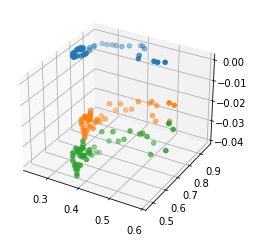

In [6]:
# plot 3 digits x,y,z for first 50 frames

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
x, y, z = pose_digit1[:50, 0], pose_digit1[:50, 1], pose_digit1[:50, 2],  
ax.scatter3D(x, y, z)
x, y, z = pose_digit2[:50, 0], pose_digit2[:50, 1], pose_digit2[:50, 2],  
ax.scatter3D(x, y, z)
x, y, z = pose_digit3[:50, 0], pose_digit3[:50, 1], pose_digit3[:50, 2],  
ax.scatter3D(x, y, z)

plt.show()

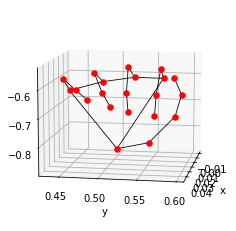

In [25]:
# single hand skeleton
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=10, azim=10)

plotted_landmarks = {}
for i in range(21):
    pose_digit = np.array(df.iloc[:, (3*i+1):(3*i+1)+3])
    ax.scatter3D(
        xs=[-pose_digit[0, 2]],
        ys=[pose_digit[0, 0]],
        zs=[-pose_digit[0, 1]],
        color='r',
        linewidth=2)
    plotted_landmarks[i] = (-pose_digit[0, 2], 
                              pose_digit[0, 0], 
                              -pose_digit[0, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')

num_landmarks = 21
# Draws the connections if the start and end landmarks are both visible.
for connection in mp_hands.HAND_CONNECTIONS:
    start_idx = connection[0]
    end_idx = connection[1]

    if start_idx in plotted_landmarks and end_idx in plotted_landmarks:
        landmark_pair = [
            plotted_landmarks[start_idx], plotted_landmarks[end_idx]
        ]
    ax.plot3D(
        xs=[landmark_pair[0][0], landmark_pair[1][0]],
        ys=[landmark_pair[0][1], landmark_pair[1][1]],
        zs=[landmark_pair[0][2], landmark_pair[1][2]],
        color='k',
        linewidth=0.8)
plt.show()

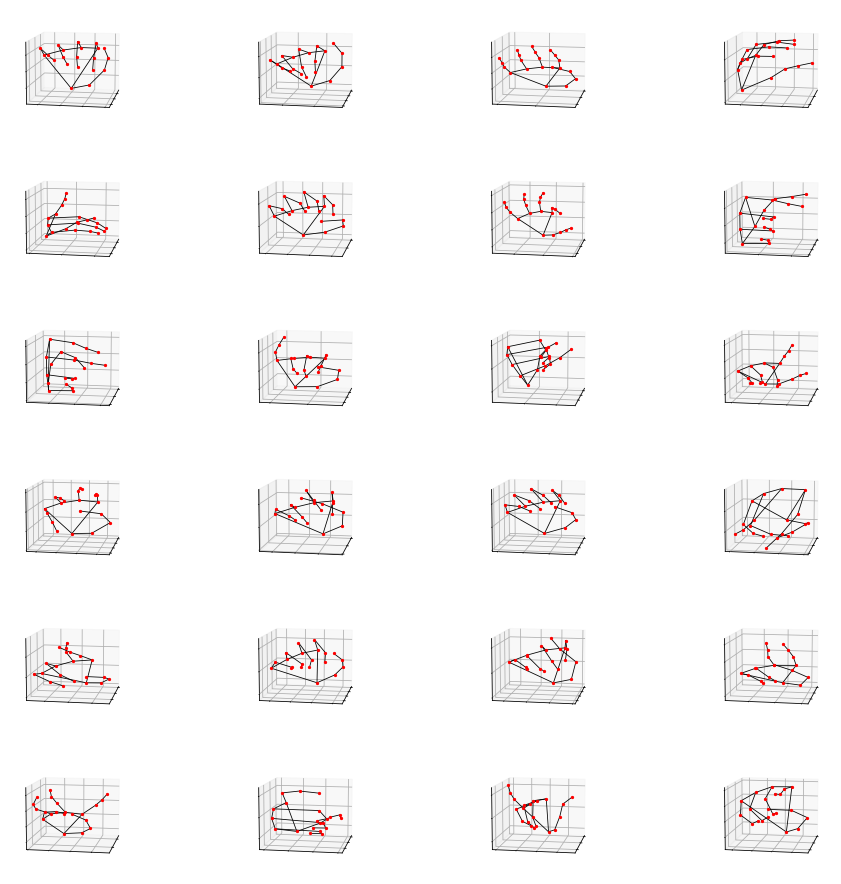

In [24]:
# subplot with various fingerspelling skeleton
fig = plt.figure(figsize=(16, 16))
num_landmarks = 21
rows = 6
cols = 4

nskip = 50
offset = 0

for m in range(int(rows*cols)):
    try:
        ax = fig.add_subplot(rows, cols, m+1, projection='3d')
        ax.view_init(elev=10, azim=10)
        plotted_landmarks = {}
        for i in range(21):
            pose_digit = np.array(df.iloc[:, (3*i+1):(3*i+1)+3])
            ax.scatter3D(
                xs=[-pose_digit[m*nskip+offset, 2]],
                ys=[pose_digit[m*nskip+offset, 0]],
                zs=[-pose_digit[m*nskip+offset, 1]],
                color='r',
                s=5,
                linewidth=1)
            plotted_landmarks[i] = (-pose_digit[m*nskip+offset, 2], 
                                      pose_digit[m*nskip+offset, 0], 
                                      -pose_digit[m*nskip+offset, 1])


        # Draws the connections if the start and end landmarks are both visible.
        for connection in mp_hands.HAND_CONNECTIONS:
            start_idx = connection[0]
            end_idx = connection[1]

            if start_idx in plotted_landmarks and end_idx in plotted_landmarks:
                landmark_pair = [
                    plotted_landmarks[start_idx], plotted_landmarks[end_idx]
                ]
            ax.plot3D(
                xs=[landmark_pair[0][0], landmark_pair[1][0]],
                ys=[landmark_pair[0][1], landmark_pair[1][1]],
                zs=[landmark_pair[0][2], landmark_pair[1][2]],
                color='k',
                linewidth=0.8)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.set_zticklabels('')
    except:
        pass
plt.show()
fig.savefig(r'./3d_pose_estimation.svg')